In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

In [11]:
# Download historical data for USD Index and Gold (XAU/USD)
usd_index = yf.download("DX-Y.NYB", start="2020-01-01", end="2024-08-21")
gold = yf.download("GC=F", start="2020-01-01", end="2024-08-21")
usd_index = usd_index[['Close']].rename(columns={'Close': 'USD_Index'})
gold = gold[['Close']].rename(columns={'Close': 'Gold_Prices'})
data = usd_index.join(gold, how='inner')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


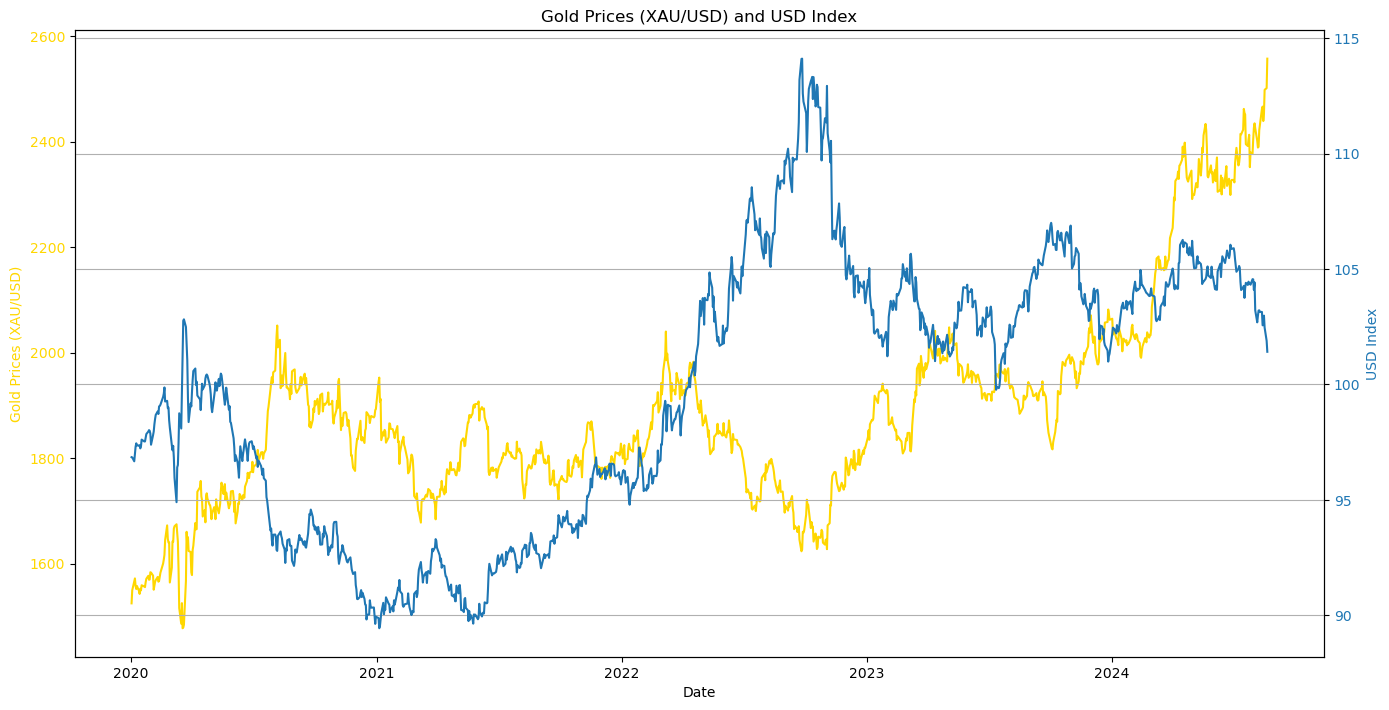

In [27]:
# Plot the Gold prices and USD Index together using a twin y-axis
fig, ax1 = plt.subplots(figsize=(14, 7))

color = 'gold'
ax1.set_xlabel('Date')
ax1.set_ylabel('Gold Prices (XAU/USD)', color=color)
ax1.plot(data.index, data['Gold_Prices'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('USD Index', color=color)  # we already handled the x-label with ax1
ax2.plot(data.index, data['USD_Index'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # adjust subplots to fit into the figure area.
plt.title('Gold Prices (XAU/USD) and USD Index')
plt.grid(True)
plt.show()


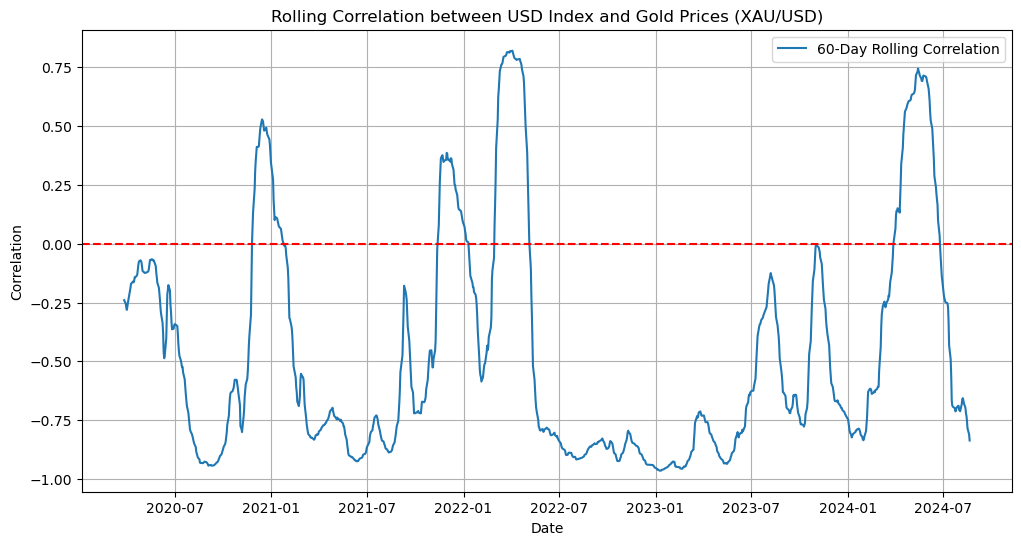

In [16]:
# Calculate the rolling correlation (120-day window) to observe changes over time
data['Rolling_Corr'] = data['USD_Index'].rolling(window=60).corr(data['Gold_Prices'])
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Rolling_Corr'], label='60-Day Rolling Correlation')
plt.axhline(y=0, color='red', linestyle='--',)
plt.title('Rolling Correlation between USD Index and Gold Prices (XAU/USD)')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()